# 🔰PyTorchでニューラルネットワーク基礎 #12.5 【音楽データ】

## 内容
* Qiitaの記事と連動しています
* librosaを用いたwavファイルの読み込みとデータの加工

## 音声データについて
* 演習の音声データは、プロ生のキャラクター「プロ生ちゃん（暮井 慧）（CV: 上坂すみれ様）」の音声を利用しています。
* 演習を行う際は、下記のURLからファイルをダウンロードしてご利用ください。
* [kei_01.wav](https://sounds.pronama.jp/share/kureikei/voice/kei_2013_%E7%A7%81%E3%80%81%E6%9A%AE%E4%BA%95%E6%85%A7%20%E3%82%88%E3%82%8D%E3%81%97%E3%81%8F%E3%81%AD)として保存。
* [kei_02.wav](https://sounds.pronama.jp/share/kureikei/voice/kei_2013_%E3%81%A1%E3%82%87%E3%80%81%E3%81%A1%E3%82%87%E3%81%A3%E3%81%A8%20%E3%81%82%E3%82%8F%E3%81%A6%E3%81%AA%E3%81%84%E3%80%81%E3%81%82%E3%82%8F%E3%81%A6%E3%81%AA%E3%81%84%20%E8%90%BD%E3%81%A1%E3%81%A4%E3%81%84%E3%81%A6%E8%A6%8B%E7%9B%B4%E3%81%97%E3%81%A6)として保存。




In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [3]:
# wavファイルを読み込む
# audio: 音声データ（numpy配列）
# sr: サンプリングレート（Hz）
# librosaは指定したサンプリングレートで読み込む
# sr=Noneだともともとの音源データのサンプリングレートとなる
filename = "kei_data/kei_01.wav"
audio, sr = librosa.load(filename, sr=None)

In [4]:
print(f"音声データの形状: {audio.shape}")
print(f"サンプリングレート: {sr} Hz")
print(f"再生時間: {len(audio)/sr:.2f} 秒")
print(f"データ型: {audio.dtype}")
print(f"値の範囲: {audio.min():.3f} ～ {audio.max():.3f}")

音声データの形状: (130065,)
サンプリングレート: 44100 Hz
再生時間: 2.95 秒
データ型: float32
値の範囲: -0.966 ～ 0.966


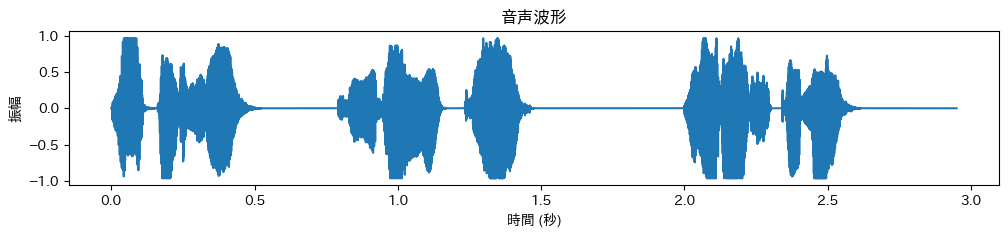

In [5]:
plt.figure(figsize=(12, 2))
time = np.linspace(0, len(audio)/sr, len(audio))
plt.plot(time, audio)
plt.xlabel('時間 (秒)')
plt.ylabel('振幅')
plt.title('音声波形')
plt.show()

# サンプリングレート
* 単位はHz
* 1秒間に集める音の数（音の振幅をサンプリングする回数）
* sampling rate = 10 なら1秒間の音を10個の数値で表現する
* サンプリングレートは一般的に、16000Hz、22050Hz、44100Hzなどが利用される
* 音声データサンプル数/サンプリングレート で再生時間（秒）になる

### サンプリングレートを10Hzで試してみた
* librosa.loadのサンプリングレートを指定するオプション　sr　を変更してみる 


In [15]:
test_audio, test_sr = librosa.load(filename, sr=10)
print(f"音声データの形状: {test_audio.shape}")
print(f"サンプリングレート: {test_sr} Hz")
print(f"再生時間: {len(test_audio)/test_sr:.2f} 秒")

音声データの形状: (30,)
サンプリングレート: 10 Hz
再生時間: 3.00 秒


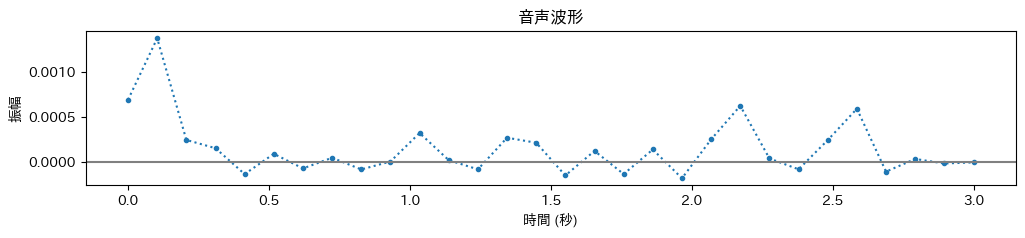

In [16]:
plt.figure(figsize=(12, 2))
time = np.linspace(0, len(test_audio)/test_sr, len(test_audio))

plt.plot(time, test_audio,linestyle="dotted" ,marker=".")
plt.axhline(y=0, color='gray', linestyle='-')
plt.xlabel('時間 (秒)')
plt.ylabel('振幅')
plt.title('音声波形')
plt.show()

## 再生
* 読み込んだ音声を再生してみる
* srの値を大きくすると、音声になるはず
* 2000くらいだと声っぽい

In [17]:
from IPython.display import Audio
Audio(audio, rate=sr)

In [18]:
Audio(test_audio, rate=test_sr)

# ニューラルネットワークの入力データへ加工

* audio, sr = librosa.load(filename, sr)のaudioをそのまま学習データに使う
* audioを時間で同じ長さに分割する前処理が多い
* 固定長であれば、conv1dやRNNが利用できる
* 次回生波形から直接学習する方法を演習する予定

## 音源データを指定した長さで分割して、データを作成する
* segment_legth：指定した長さ
* overlap：オーバーラップさせることでデータの量を増やすことができるぞ〜


In [43]:
target_sr = 22050       # サンプリングレート
sequence_sec = 2        # 列の長さ（秒）
sequence_length = int(target_sr * sequence_sec)  # 実際の系列長


filename = "kei_data/kei_02.wav"
audio, sr = librosa.load(filename, sr=target_sr)     # ファイル読み込み
divided_number = len(audio)//sequence_length         # 分割できる数・分割数

data_list = [audio[i*sequence_length:(i+1)*sequence_length] for i in range(0,divided_number)]

x = np.array(data_list)

print(f"系列長：{sequence_length}")
print(f"再生時間：{sequence_sec}秒")
print(f"xの形状：{x.shape}")

系列長：44100
再生時間：2秒
xの形状：(2, 44100)


In [44]:
Audio(x[0], rate=target_sr)